In [1]:
import scipy
import numpy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hier
import numpy as np
import climetlab as cml
import cartopy.crs as ccrs
import xarray as xr

# Clustering

### What is clustering?
- Clustering works by basically grouping "obervations" (data points) in n-dimensions, based on some distance measure (for example, and most commonly, Euclidian distance). Clusters are defined by points separated by small distances relative to the distance to other clusters. Note there are a few different ways to define the distance between a point and a cluster.
- It is an exploratory statistical technique that can be used to reveal patterns in data (rather than an inferential technique.
- Taking a machine learning perspective, clustering is an "unsupervised" learning task. That is, the correct number of clusters and cluster characteristics are not known ahead of time within a "training" dataset. An example of a "supervised" task, in contrast, could be a simple linear regression, where we are fitting a line to a set of known values.

![SegmentLocal](clustering.png "segment")


## Three types of clustering and applications in atmospheric sciences

### Hierarchical clustering (from Knutti et al. 2013)

![SegmentLocal](grl50256-fig-0001-m.jpeg "segment")


### Non-hierarchical clustering: K-means 

![SegmentLocal](k-means.png "segment")


### Machine learning: Self-organising maps (from Hope et al. 2014)

![SegmentLocal](som.png "segment")


# Hierarchical Clustering
### Procedure
1. Start with a set of m observations, with n dimensions/variables
2. Define m clusters, where each cluster has one member
3. Calculate the distance between each possible pair of clusters
4. Group the clusters with minimum distance*
5. Return to step 2
6. Repeat steps 2-4 until there is one cluster with m observations

*Distance between observations is usually Euclidian distance, but distance between clusters can be defined in multiple ways

## Example of hierarchical clustering

In [2]:
#Define "observations" in two dimenstions
x = [2,1.5,3.5,3.9,4.5]
y = [1,2,1.5,2,3.5]
labels = ["a","b","c","d","e"]

Text(0.5, 0.98, 'Minimum-based distance criteria')

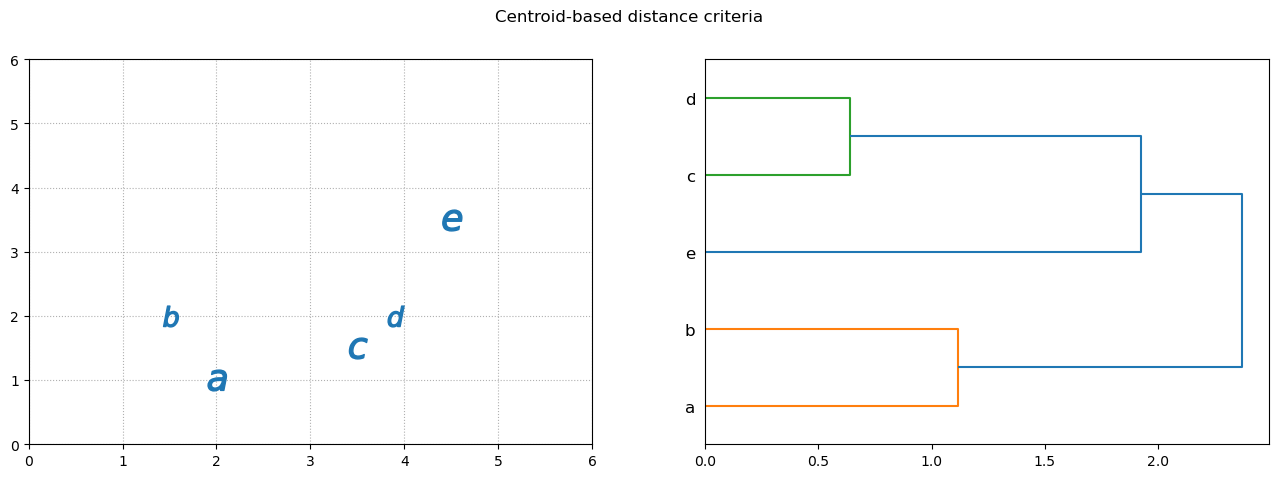

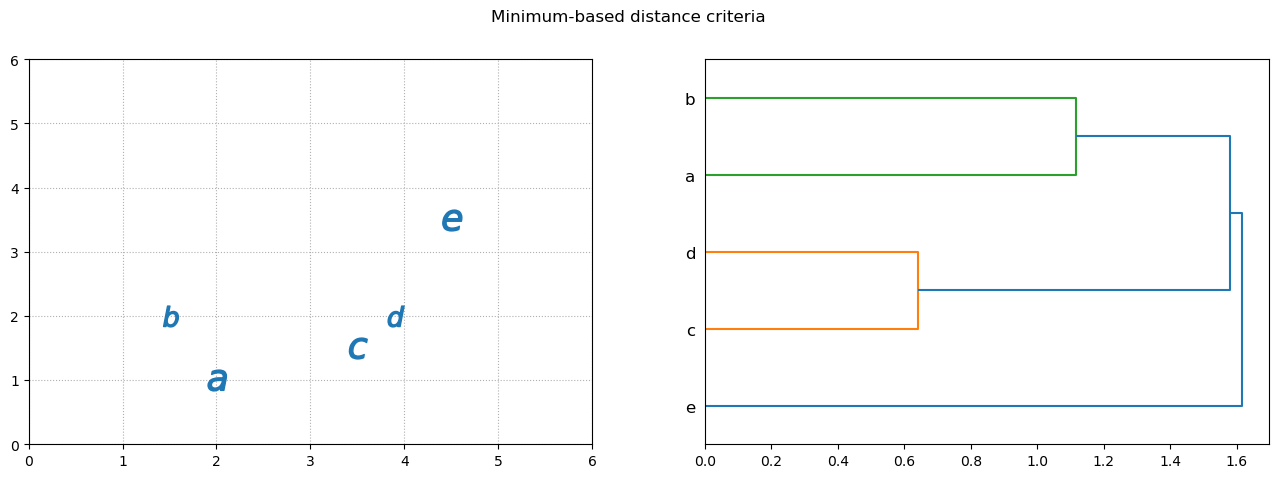

In [3]:
#Plot observations
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
[plt.plot(i,j,marker="$"+k+"$",color="tab:blue",ms=15) for i,j,k in zip(x,y,labels)]
plt.ylim([0,6])
plt.xlim([0,6])
plt.gca().grid(ls=":")

#Do heirarchical clustering and visualise using a dendrogram
plt.subplot(1,2,2)
X = [[i,j] for i,j in zip(x,y)]
Z = hier.linkage(X,method="centroid")
hier.dendrogram(Z,labels=["a","b","c","d","e"],orientation="right");

plt.suptitle("Centroid-based distance criteria")



#Plot observations
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
labels = ["a","b","c","d","e"]
[plt.plot(i,j,marker="$"+k+"$",color="tab:blue",ms=15) for i,j,k in zip(x,y,labels)]
plt.ylim([0,6])
plt.xlim([0,6])
plt.gca().grid(ls=":")

#Do heirarchical clustering and visualise using a dendrogram
plt.subplot(1,2,2)
X = [[i,j] for i,j in zip(x,y)]
Z = hier.linkage(X,method="single")
hier.dendrogram(Z,labels=["a","b","c","d","e"],orientation="right");

plt.suptitle("Minimum-based distance criteria")

### How to decide which clusters are relevant somewhere between m and 1 clusters?

Can look at the distance between merged clusters at each iteration. See below example from Wilks (2011). The distance of the merged clusters jumps sharply after around 22 iterations. This suggests that clusters are being merged that are separated by a relatively large distance, and therefore might have different characteristics. The optimal stopping point is largely subjective though, and might depend on other information or prior knowledge about the data.

![SegmentLocal](wilks.png "segment")


# Non-hierarchical clustering (K-means)

Non-hierarchical clustering differs from hierarchical clustering in that the algorithm is initialised with a pre-determined number of clusters that stays constant, rather than m cluters (where m is the number of observations), and observations can change clusters. The main non-hierarchical clustering approach is called 'k-means' clustering.

K = number of clusters, defined before the algorithm is applied

Procedure:

1. Randomly assign observations to K clusters (through random partition, random seeding, or hierarchical clustering)
2. Compute the centroid (mean) of each of the K clusters
3. Compute the distance between each observation and each cluster centroid. Observations will either remain in the same cluster, or change clusters, and the centroids will be updated accordingly
4. Repeat until all observations are assigned to the cluster with smallest distance to it's centroid, and the method converges

![SegmentLocal](K-means_convergence.gif "segment")


## Example of non-hierarchical clustering with two dimensions/features (K-means)

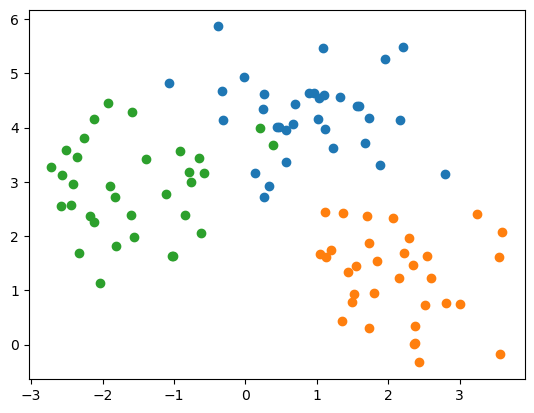

In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans

#Create a toy dataset that should have three clusters, with some overlap controlled by cluster_std. 
#The dataset has 2 variables/dimensions, to make visualisation straightforward
X,y = datasets.make_blobs(n_features=2,n_samples=100,centers=3,random_state=0,cluster_std=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],ls="none",marker="o")
plt.plot(X[y==1][:,0],X[y==1][:,1],ls="none",marker="o")
plt.plot(X[y==2][:,0],X[y==2][:,1],ls="none",marker="o")

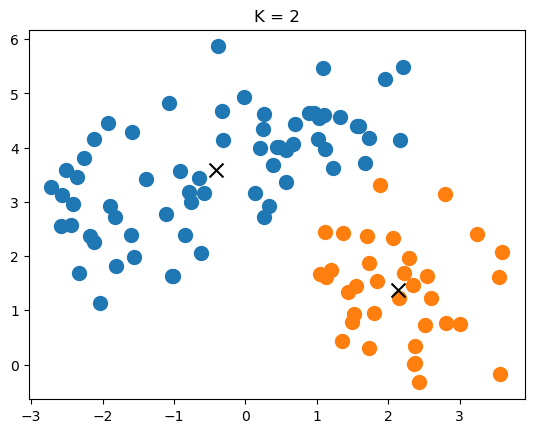

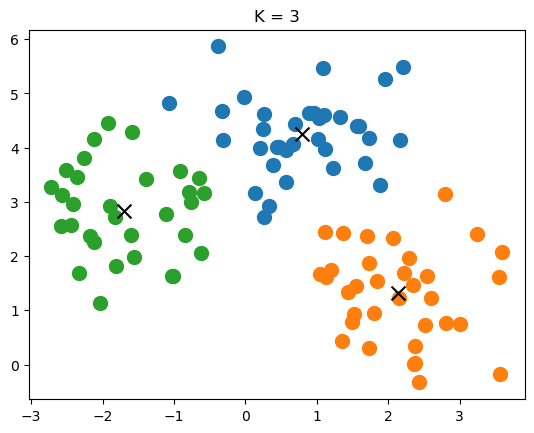

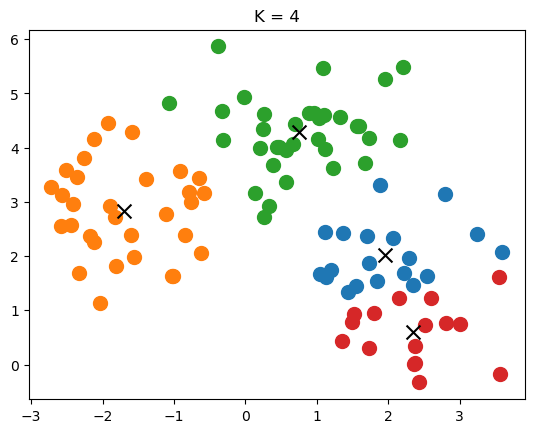

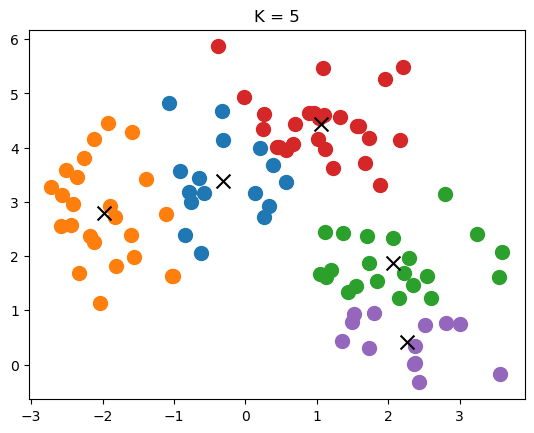

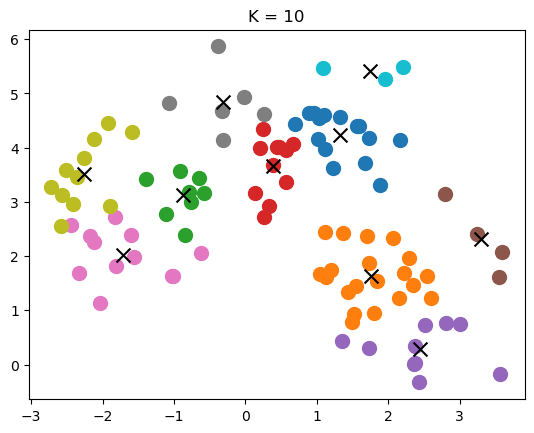

In [5]:
def fit_and_plot(n,ax):

    #Create a k-means object and fit it using the toy data, X.
    #n_clusters - how many clusters to set.
    #init - stratergy for the initialisation of k clusters. k-means++ does something smarter than randomly assigning the clusters
    #max_iter - set a limit on the number of algorithm iterations (in case the cluster centroids never converge)
    #n_init - this is the number of times the clustering is done with different random initialisations    
    kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(X)

    #Visualising the clusters as determined by the algorithm
    [ax.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100) for i in np.arange(n)]

    #Plot the centroids of the clusters
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'k', label = 'Centroids', marker="x")
    
    plt.title("K = "+str(n))

#Using k-means, perform clustering on the toy dataset for a range of K    
plt.figure(); fit_and_plot(2,plt.gca())
plt.figure(); fit_and_plot(3,plt.gca())
plt.figure(); fit_and_plot(4,plt.gca())
plt.figure(); fit_and_plot(5,plt.gca())
plt.figure(); fit_and_plot(10,plt.gca())

## How to decide on the number of clusters to choose?

Unlike hierarchical clustering where k (number of clusters) iterates from m (number of observations) to 1, K-means clustering uses only one choice of k. To test what might be a good choice of k, we therefore perform the clustering multiple times, and vary this quantity.

To evaluate what is "good" clustering, usually some metric is used that measures:
1. The distance between observations within each cluster, which should be minimised.
2. The distance between observations and the closest cluster that it is not a member of, which should be maximised.

An example is the silhouette score.

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score?

Signature:
silhouette_score(
    X,
    labels,
    *,
    metric='euclidean',
    sample_size=None,
    random_state=None,
    **kwds,
)
Docstring:
Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster
distance (``a``) and the mean nearest-cluster distance (``b``) for each
sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
b)``.  To clarify, ``b`` is the distance between a sample and the nearest
cluster that the sample is not a part of.
Note that Silhouette Coefficient is only defined if number of labels
is ``2 <= n_labels <= n_samples - 1``.

This function returns the mean Silhouette Coefficient over all samples.
To obtain the values for each sample, use :func:`silhouette_samples`.

The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters. Negative values generally indicate that a sample has
been assigned to the wrong cluster, as a different cluster is more s

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:07<00:00, 12.56it/s]


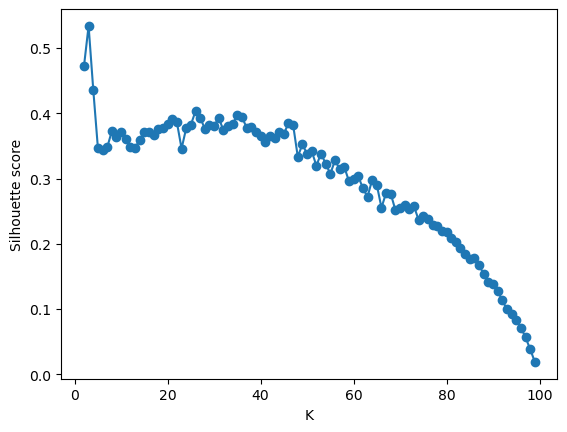

In [8]:
import tqdm

def silhouette_test(X,n=20):
    
    score = []
    for i in tqdm.tqdm(np.arange(2,n+1)):
        kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        labels = kmeans.fit_predict(X)
        score.append(silhouette_score(X,labels))
    plt.plot(np.arange(2,n+1),score,marker="o")
    plt.ylabel("Silhouette score")
    plt.xlabel("K")
    
#We know that K=3 should be optimal, because we created the dataset. 
#Ordinarily we would not know this, but the silhouette score suggests K=3 leads to "good" clustering
# (that is, intra-cluster distances are small, inter-cluster distances are large)
# K=100 is trivial for this dataset with 100 points, but it is interesting to see how the score behaves.
silhouette_test(X,n=99)

## Example of non-hierarchical clustering with 64521 dimensions/features (MSLP over Australia)

A common application of clustering in atmospheric sciences is trying to catergorise large-scale weather patterns ("synoptic types"). The below example uses the same K-means approach as above, but applied to atmospheric data over Australia (geopotential on 500 hPa surface). The only difference between this application and the example above is the number of dimensions/variables, where each spatial grid point is a variable

In [9]:
#Download ERA5 data for 10 years covering the month of June, using the climate lab package

source = cml.load_source(
    "cds",
    "reanalysis-era5-pressure-levels",
    variable=["z"],
    pressure_level=["500"],
    product_type="reanalysis",
    area=[-10, 100, -60, 180],
    year=[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
    time="12:00",
    month="06"
)

2023-04-16 21:39:15,239 INFO Welcome to the CDS
2023-04-16 21:39:15,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-04-16 21:39:15,642 INFO Request is queued
2023-04-16 21:39:16,980 INFO Request is running
2023-04-16 21:39:50,217 INFO Request is completed
2023-04-16 21:39:50,219 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1681645156.0952833-22683-18-da786712-cac0-4f45-8795-3b5f2f3fcd59.grib to /var/folders/v2/g0hx059n6pn53n9xbcnykqbr0000gp/T/climetlab-andrewb1/cds-retriever-e8ef482cf0fb683c848489598692e808b9005008cc8d5858c3ecda25529d6ed0.cache.tmp (37M)
2023-04-16 21:40:09,363 INFO Download rate 1.9M/s                                                                                                                               


In [10]:
#The shape of the data we want to cluster is 300 days, by 201 latitude points, by 321 longitude points
da = source.to_xarray()["z"].squeeze()
print(da.shape)

(300, 201, 321)


In [11]:
#We can reshape this in the form of (m,n), where m (300) is the number of observations/data points, and n (64,521) is the number of dimensions/variables

X = da.stack(latlon=("latitude","longitude")).values
print(X.shape)

(300, 64521)


(100.0, 180.0)

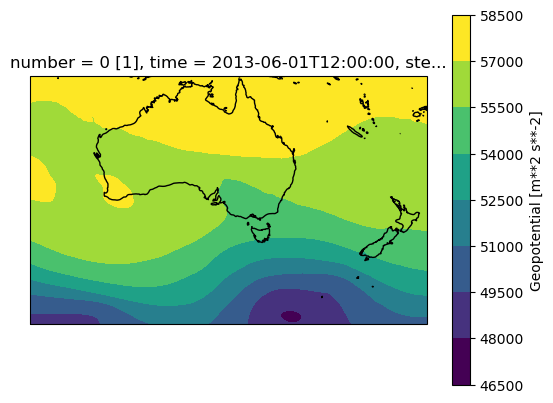

In [12]:
#This is what the first data point looks like

ax=plt.axes(projection=ccrs.PlateCarree())
xr.plot.contourf(da.isel(time=0),ax=ax,levels=10)
ax.coastlines()
plt.xlim([100,180])

In [13]:
#This is all the code it takes to actually do the clustering.
#n_clusters - how many clusters to set. Choose three here (just because)
#init - stratergy for the initialisation of k clusters. k-means++ does something smarter than randomly assigning the clusters
#max_iter - set a limit on the number of algorithm iterations (in case the cluster centroids never converge)
#n_init - this is the number of times the clustering is done with different random initialisations

kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, verbose=0)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

(100.0, 180.0)

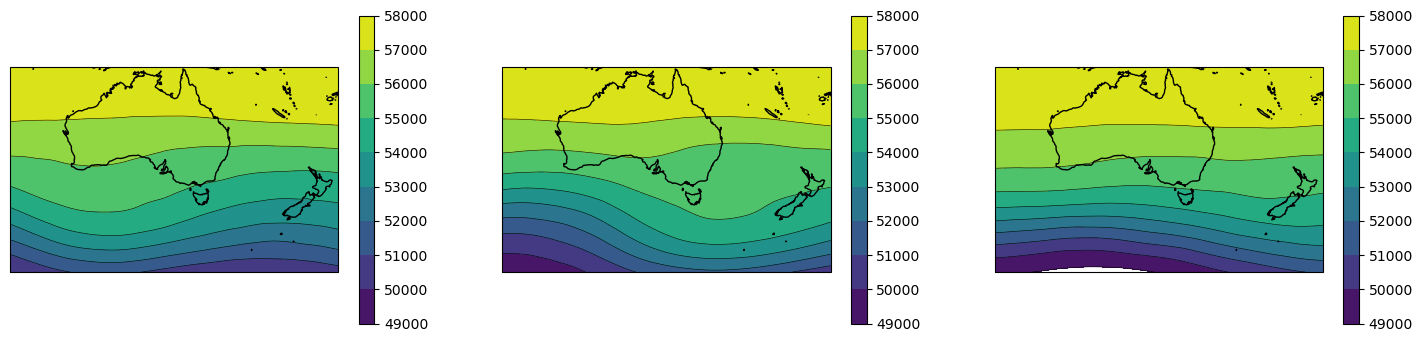

In [14]:
#Check what the three cluster centroids look like.
#If doing this properly, we might also need to check the intra-cluster spread (how close each observation is to 
# these centroids)
#We would also need some justification for our choice of K, either by something like the silhouette score, or a 
# physical argument based on other information or prior knowledge.

centroid1 = kmeans.cluster_centers_[0].reshape((da.shape[1],da.shape[2]))
centroid2 = kmeans.cluster_centers_[1].reshape((da.shape[1],da.shape[2]))
centroid3 = kmeans.cluster_centers_[2].reshape((da.shape[1],da.shape[2]))

lons,lats = np.meshgrid(da.longitude.values,da.latitude.values)

plt.figure(figsize=[18,4])
ax=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
plt.contourf(lons,lats,centroid1,levels=np.linspace(49000,58000,10)); plt.colorbar()
plt.contour(lons,lats,centroid1,levels=np.linspace(49000,58000,10),colors="k",linewidths=0.4)        
ax.coastlines()
plt.xlim([100,180])

ax=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
plt.contourf(lons,lats,centroid2,levels=np.linspace(49000,58000,10)); plt.colorbar()
plt.contour(lons,lats,centroid2,levels=np.linspace(49000,58000,10),colors="k",linewidths=0.4)       
ax.coastlines()
plt.xlim([100,180])

ax=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
plt.contourf(lons,lats,centroid3,levels=np.linspace(49000,58000,10)); plt.colorbar()
plt.contour(lons,lats,centroid3,levels=np.linspace(49000,58000,10),colors="k",linewidths=0.4)       
ax.coastlines()
plt.xlim([100,180])

# Clustering using neural networks: A note on self-organising maps

Self-organising maps (SOMs) have become a popular approach for clustering on high dimensional data as an alternative to k-means. SOMs work in a similar way to the clustering approaches mentioned earlier (i.e. minimising intra-cluster diatances) but using a neural network approach.

![Segment](Neural_network_example.svg "segment")


SOMs "map" input data from n-dimensions to a two-dimensial grid. For clustering, we can think of this 2d grid as a grid of clusters.

SOM output is also designed to preserve the topology or shape of the input data, by allowing for the movement of cluster centroids to influence neighbouring centroids - rather than in k-means where each iteration cluster centroids change independently of each other. You can observe this in the SOM clustering below. This allows for smoothly varying clusters, and clusters that can exist between data points.

![Segment](TrainSOM.gif "segment")


### See below an example that uses the MiniSom package. First on the same toy dataset that we used for k-means, then on the ERA5 data we downloaded

In [16]:
from minisom import MiniSom

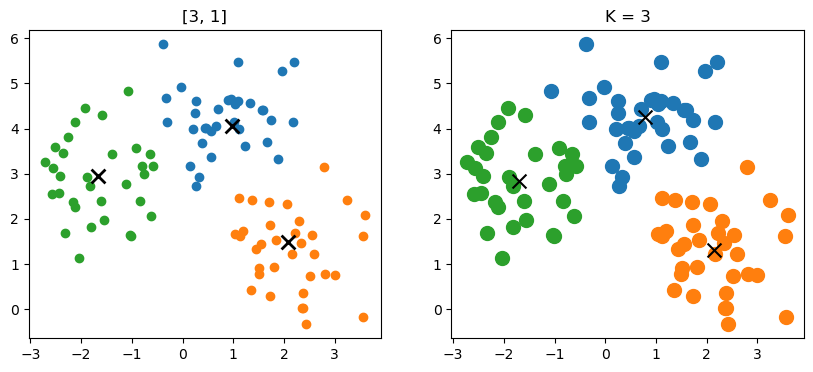

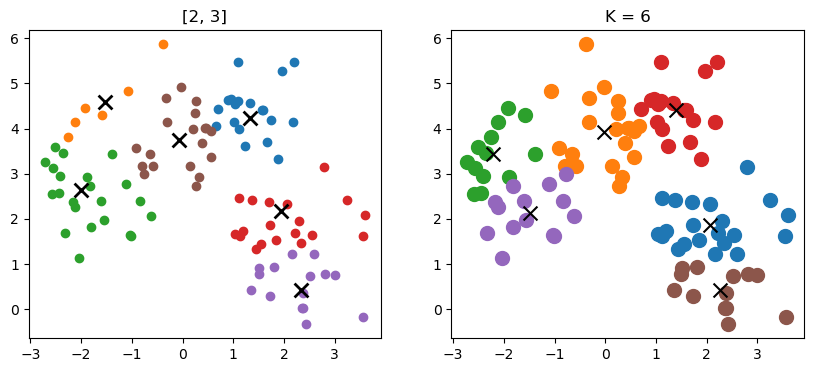

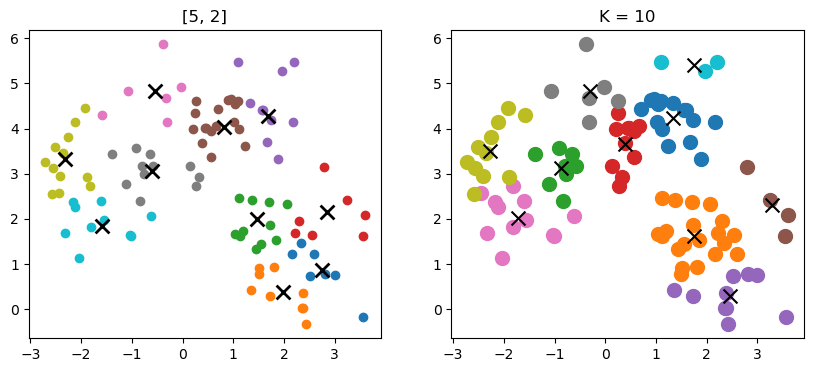

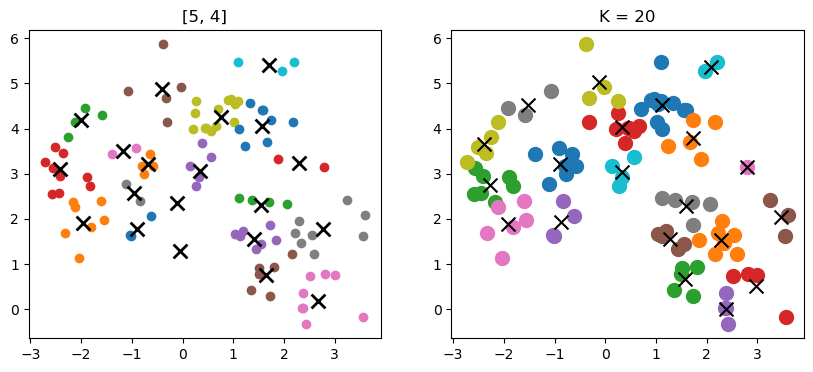

In [17]:
def fit_and_plot_som(X,som_shape,ax,sigma=0.5,iterations=5000,random_seed=None):

    #Create a SOM object and train. As with other ML algorithms, there are "hyperparameters" that need to be tuned, 
    #but have not changed these for now except for sigma (only to surpress a warning from MiniSom)
    som = MiniSom(som_shape[0],som_shape[1],X.shape[1],sigma=sigma,random_seed=random_seed)
    som.train(X,iterations)

    #Retrieve the cluster of each data point
    winner_coordinates = np.array([som.winner(i) for i in X]).T
    # with np.ravel_multi_index we convert the bidimensional
    # coordinates to a monodimensional index
    y_som = np.ravel_multi_index(winner_coordinates, som_shape)    
    
    #Visualising the clusters
    for c in np.unique(y_som):
        ax.scatter(X[y_som == c, 0],
                    X[y_som == c, 1])
        
    #Plotting the centroids of the clusters
    for centroid in som.get_weights():
        ax.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                    s=100, linewidths=2, color='k', label='centroid')    
    plt.title(som_shape)

X,y = datasets.make_blobs(n_features=2,n_samples=100,centers=3,random_state=0,cluster_std=0.8)

plt.figure(figsize=[10,4])
fit_and_plot_som(X,[3,1],ax=plt.subplot(1,2,1),random_seed=0)
fit_and_plot(3,ax=plt.subplot(1,2,2))

plt.figure(figsize=[10,4])
fit_and_plot_som(X,[2,3],ax=plt.subplot(1,2,1),random_seed=0)
fit_and_plot(6,ax=plt.subplot(1,2,2))

plt.figure(figsize=[10,4])
fit_and_plot_som(X,[5,2],ax=plt.subplot(1,2,1),random_seed=0)
fit_and_plot(10,ax=plt.subplot(1,2,2))

plt.figure(figsize=[10,4])
fit_and_plot_som(X,[5,4],ax=plt.subplot(1,2,1),random_seed=0)
fit_and_plot(20,ax=plt.subplot(1,2,2))


In [18]:
#Now repeat on the ERA5 data

X = da.stack(latlon=("latitude","longitude")).values
print(X.shape)

som = MiniSom(4,4,X.shape[1])
som.train(X,10000,verbose=True)

(300, 64521)
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 169295.56609195683


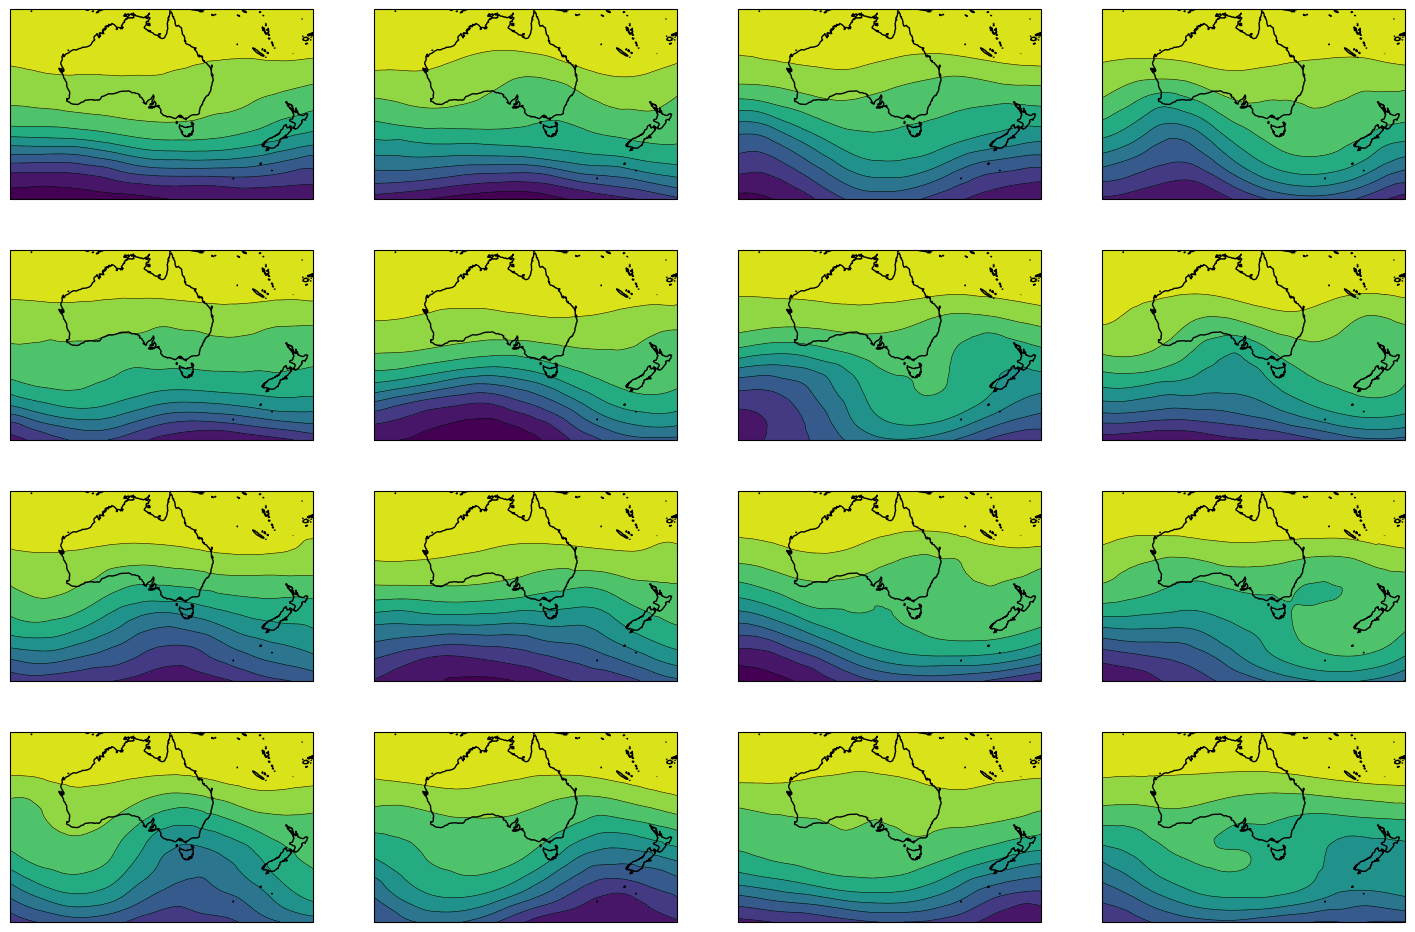

In [19]:
plt.figure(figsize=[18,12])

cnt=1
for x in [0,1,2,3]:
    for y in [0,1,2,3]:


        centroid = som.get_weights()[x,y].reshape((da.shape[1],da.shape[2]))
        
        lons,lats = np.meshgrid(da.longitude.values,da.latitude.values)


        ax=plt.subplot(4,4,cnt,projection=ccrs.PlateCarree())
        plt.contourf(lons,lats,centroid,levels=np.linspace(49000,58000,10),extend="both")
        plt.contour(lons,lats,centroid,levels=np.linspace(49000,58000,10),colors="k",linewidths=0.4)        
        ax.coastlines()
        plt.xlim([100,180])
        cnt=cnt+1